Average daily CPU usage per region:
region
East US           75.640741
North Europe      74.881481
West US           74.207407
Southeast Asia    73.877778
Name: usage_cpu, dtype: float64

Peak CPU usage per month:
month
2023-01    99
2023-02    99
2023-03    99
Freq: M, Name: usage_cpu, dtype: int64

Top 5 regions by total CPU usage:
region
East US           20423
North Europe      20218
West US           20036
Southeast Asia    19947
Name: usage_cpu, dtype: int64


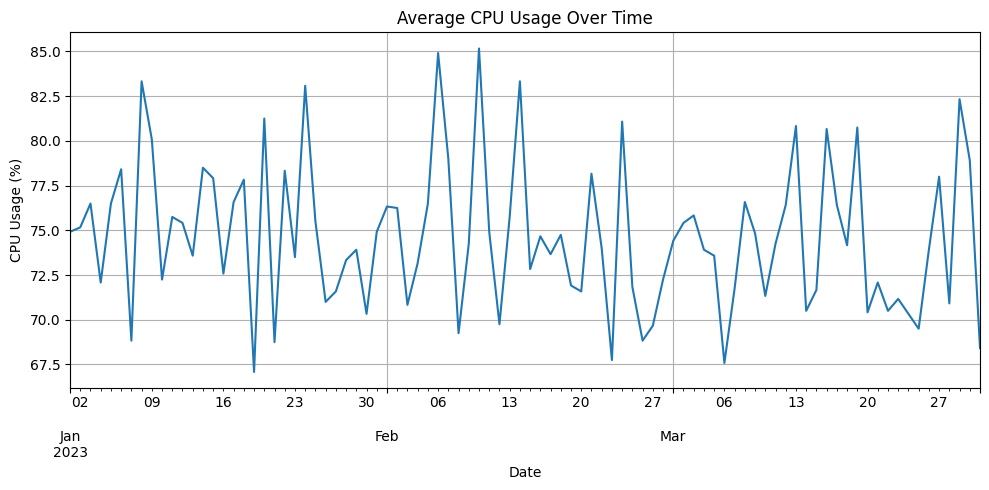

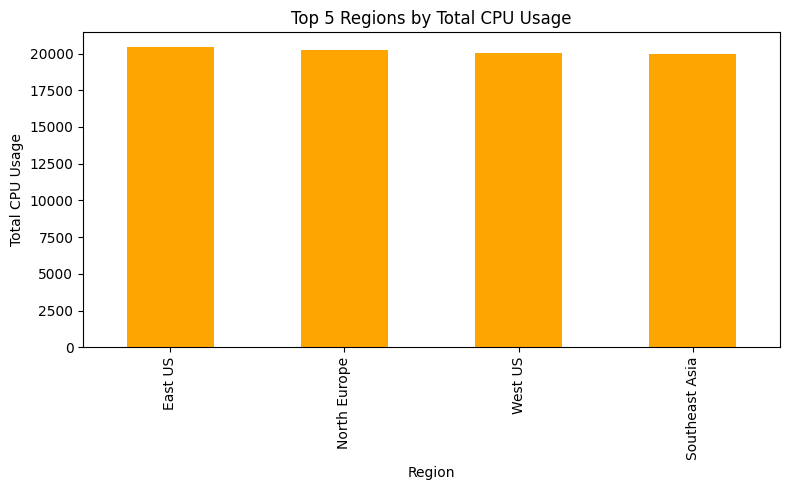

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged dataset
df = pd.read_csv('../data/processed/cleaned_merged.csv', parse_dates=['date'])

# 1. Average daily CPU usage per region
avg_cpu = df.groupby('region')['usage_cpu'].mean().sort_values(ascending=False)
print("Average daily CPU usage per region:")
print(avg_cpu)

# 2. Peak demand per month
df['month'] = df['date'].dt.to_period('M')
peak_cpu_by_month = df.groupby('month')['usage_cpu'].max()
print("\nPeak CPU usage per month:")
print(peak_cpu_by_month)

# 3. Top 5 regions by usage (total CPU)
top5_regions = df.groupby('region')['usage_cpu'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 regions by total CPU usage:")
print(top5_regions)

# Line plot for CPU usage trends
plt.figure(figsize=(10,5))
cpu_trend = df.groupby('date')['usage_cpu'].mean()
cpu_trend.plot()
plt.title('Average CPU Usage Over Time')
plt.xlabel('Date')
plt.ylabel('CPU Usage (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Bar plot for top 5 regions
plt.figure(figsize=(8,5))
top5_regions.plot(kind='bar', color='orange')
plt.title('Top 5 Regions by Total CPU Usage')
plt.xlabel('Region')
plt.ylabel('Total CPU Usage')
plt.tight_layout()
plt.show()